In [9]:
import pandas as pd 
import numpy as np 
import cv2
import PIL
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import glob
import random
import os
import scipy.ndimage
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage import img_as_ubyte, img_as_float
from skimage.exposure import histogram, cumulative_distribution
random.seed(100)
np.random.seed(100)

In [10]:
dicom_data = pd.read_csv(r'C:/Users/junio/Desktop/Thesis/CBIS_DDSM_Image_Processing/data/csv/dicom_info.csv')

def get_dicom_head():
    dicom_data.head()

get_dicom_head()

In [11]:
def get_dicom_info():
    return dicom_data.info()

get_dicom_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [12]:
image_dir = 'C:/Users/junio/Desktop/Thesis/CBIS_DDSM_Image_Processing/data/jpeg'

In [13]:
cropped_images=dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [14]:
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images[0]


'C:/Users/junio/Desktop/Thesis/CBIS_DDSM_Image_Processing/data/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg'

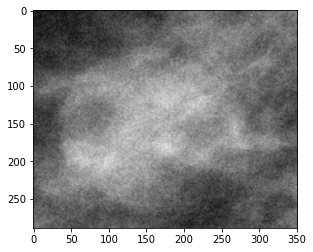

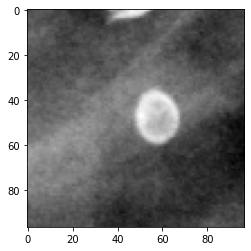

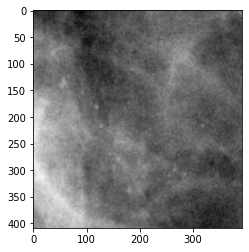

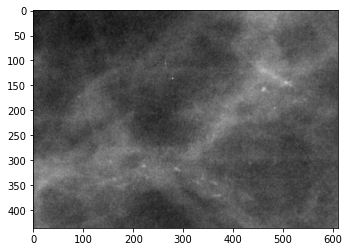

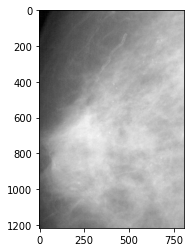

In [15]:
for file  in cropped_images[0:5]:
  cropped_images_show = PIL.Image.open(file)
  gray_img= cropped_images_show.convert("L")
  plt.figure()
  plt.imshow(gray_img, cmap='gray')

In [16]:
def get_full_mammogramms():
    full_mammogram_images_metadata = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
    #full_mammogram_images_metadata.head()
    full_mammogram_images = full_mammogram_images_metadata.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
    return full_mammogram_images

full_images = get_full_mammogramms()

print(len(full_images))
# full_images = get_full_mammogramms()

# for file  in full_images[0:1]:
#   full_mammogram_images_show = PIL.Image.open(file)
#   gray_img= full_mammogram_images_show.convert("L")
#   lum_img = full_mammogram_images_show[:, :, 0]
#   plt.imshow(lum_img)
#   plt.figure()
#   plt.imshow(full_mammogram_images_show, cmap='gray')
#   plt.imshow(lum_img)


2857
